In [1]:
import numpy as np
from tensorflow import keras
from keras import layers

Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Train the model

In [4]:
batch_size = 64
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 23s 26ms/step - loss: 0.2640 - accuracy: 0.9176 - val_loss: 0.0662 - val_accuracy: 0.9807
Epoch 2/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0944 - accuracy: 0.9718 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 3/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 4/10
844/844 [==============================] - 19s 22ms/step - loss: 0.0617 - accuracy: 0.9812 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 5/10
844/844 [==============================] - 18s 22ms/step - loss: 0.0557 - accuracy: 0.9824 - val_loss: 0.0357 - val_accuracy: 0.9918
Epoch 6/10
844/844 [==============================] - 18s 22ms/step - loss: 0.0492 - accuracy: 0.9840 - val_loss: 0.0327 - val_accuracy: 0.9912
Epoch 7/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0307 - val_accuracy:

Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025609390810132027
Test accuracy: 0.9911999702453613


Save the trained model

In [6]:
model.save("HandwrittenDigitRecognition.h5")

Load the saved model

In [7]:
model = keras.models.load_model('HandwrittenDigitRecognition.h5')

Predict an example

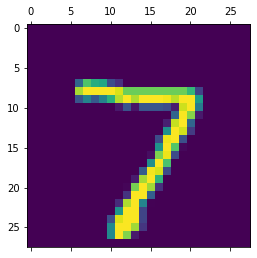

In [8]:
import matplotlib.pyplot as plt

plt.matshow(x_test[0])

In [9]:
result = np.argmax(model.predict(x_test[0].reshape(1,28,28,1)))
result

7